# Bimodal Gaussian Posterior - NPE_A method

In [1]:
import sbi
import sbi.utils
import sbi.inference
import sbi.diagnostics
import sbi.analysis
import lfi
import torch
import numpy as np

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## D = 2

In [2]:
D = 2
sim = lfi.simulators.BimodalGaussian(sigma_noise=0.1)
prior = lfi.priors.UniformPrior(low=-10, high=10, dim=D)
observation = np.zeros((1, D))

In [3]:
inference = lfi.inference.from_sbi.NPEASingleRound(
    prior=prior.return_sbi_object(),
    simulator=sim.sample_pytorch,
    observation=observation,
)

In [7]:
inference.train(simulation_budget=5_000)

  0%|          | 0/5000 [00:00<?, ?it/s]

 Neural network successfully converged after 241 epochs.

DirectPosterior sampler for potential_fn=<PosteriorBasedPotential>

In [17]:
samples = inference.sample(1_000)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

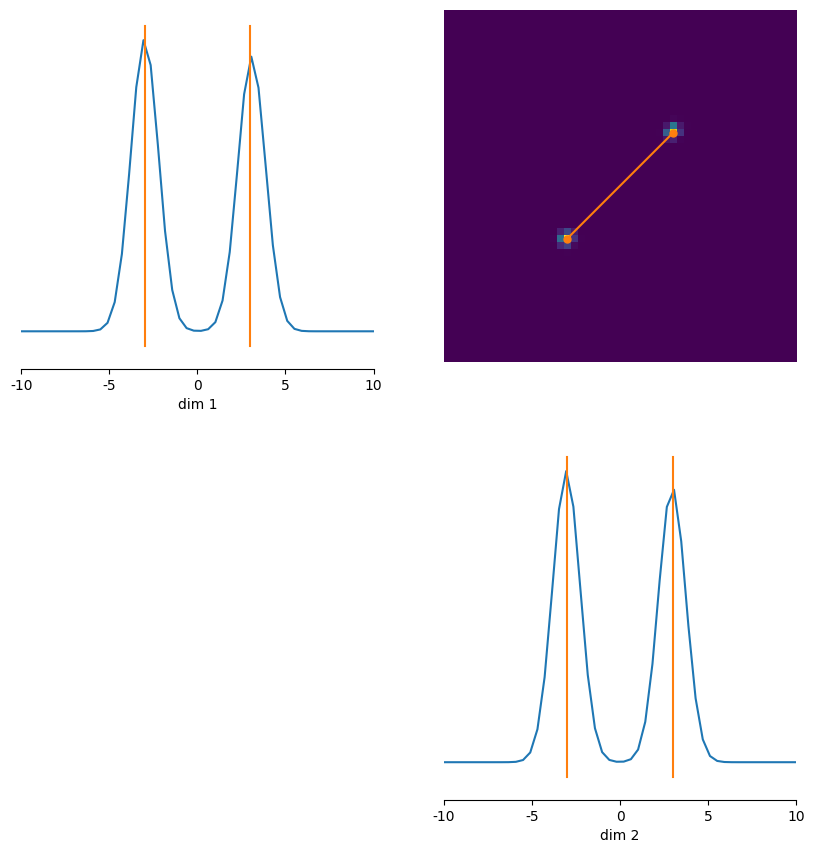

In [18]:
fig, ax = sbi.analysis.pairplot(
    samples, 
    limits=torch.tensor([-10, 10.]).repeat(D, 1), 
    points=torch.Tensor([[-3, -3], [3,3]]), 
    subset=[i for i in range(D)], 
    diag="kde"
)

## D=5 (slightly higher dimensionality than toy case)

In [4]:
D = 5
sim = lfi.simulators.BimodalGaussian(sigma_noise=0.1)
prior = lfi.priors.UniformPrior(low=-10, high=10, dim=D)
observation = np.zeros(D)
prior_sbi = prior.return_sbi_object()

### Only final round (Algorithm 2)

In [5]:
npe_a = sbi.inference.NPE_A(prior_sbi, num_components=10)

In [6]:
# Algorithm 2, ie. final_round=True
num_sims = 50_000
theta = prior_sbi.sample((num_sims,))
x = sim.sample_pytorch(theta)
_ = npe_a.append_simulations(theta, x).train(final_round=True)
posterior = npe_a.build_posterior().set_default_x(observation)

 Training neural network. Epochs trained: 4

KeyboardInterrupt: 

In [ ]:
posterior_samples = posterior.sample((1000,), x=observation)

In [ ]:
fig, ax = sbi.analysis.pairplot(posterior_samples, limits=torch.tensor([-10, 10.]).repeat(D, 1), points=observation, subset=[i for i in range(D)], diag="kde")